# ASSISTments2015 Data Analysis

## Data Description

### Column Description


| Field    | Annotation                                          |
| -------- | --------------------------------------------------- |
| user id | Id of the student |
| log id | Unique ID of the logged actions | 
| sequence id | Id of the problem set |
| correct | Correct on the fisrt attempt or Incorrect on the first attempt, or asked for help |




In [3]:
import numpy as np
import pandas as pd

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go

In [4]:
path = "/home/arthurb/Programmation/NCAT/data/2015_100_skill_builders_main_problems/2015_100_skill_builders_main_problems.csv"
data = pd.read_csv(path, encoding = "ISO-8859-15",low_memory=False) 

## Record Examples

In [5]:
pd.set_option('display.max_columns', 1000)
data.head() 

user_id     log_id  sequence_id  correct
0    50121  167478035         7014      0.0
1    50121  167478043         7014      1.0
2    50121  167478053         7014      1.0
3    50121  167478069         7014      1.0
4    50964  167478041         7014      1.0

----
## General features

In [4]:
data.describe()

user_id        log_id    sequence_id        correct
count  708631.000000  7.086310e+05  708631.000000  708631.000000
mean   296232.978276  1.695323e+08   22683.474821       0.725502
std     48018.650247  3.608096e+06   41593.028018       0.437467
min     50121.000000  1.509145e+08    5898.000000       0.000000
25%    279113.000000  1.660355e+08    7020.000000       0.000000
50%    299168.000000  1.704579e+08    9424.000000       1.000000
75%    335647.000000  1.723789e+08   14442.000000       1.000000
max    362374.000000  1.754827e+08  236309.000000       1.000000

In [5]:
print("The number of records: "+ str(len(data['log_id'].unique())))

The number of records: 708631


In [6]:
print('Part of missing values for every column')
print(data.isnull().sum() / len(data))

Part of missing values for every column
user_id        0.0
log_id         0.0
sequence_id    0.0
correct        0.0
dtype: float64


In [7]:
len(data.user_id.unique())

19917

In [8]:
len(data.sequence_id.unique())

100

## Sort by user id

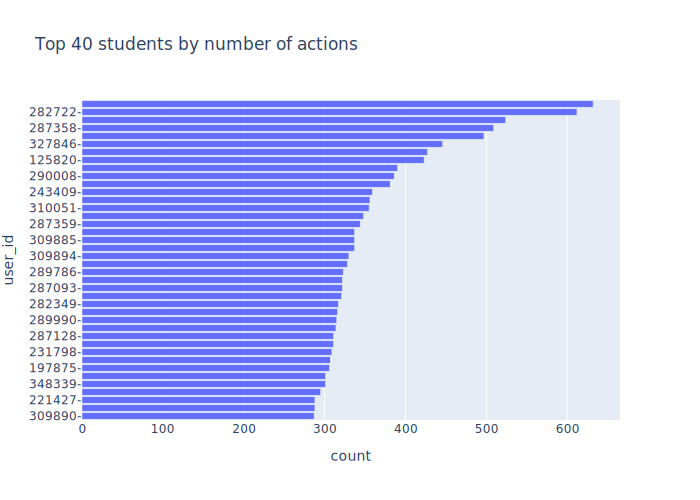

In [6]:
ds = data['user_id'].value_counts().reset_index()

ds.columns = [
    'user_id',
    'count'
]

ds['user_id'] = ds['user_id'].astype(str) + '-'
ds = ds.sort_values(['count']).tail(40)

fig = px.bar(
    ds,
    x = 'count',
    y = 'user_id',
    orientation='h',
    title='Top 40 students by number of actions'
)

fig.show("svg")

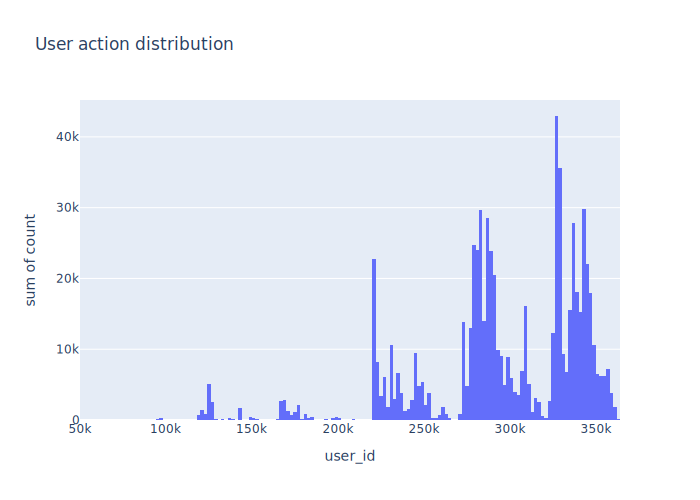

In [7]:
ds = data['user_id'].value_counts().reset_index()

ds.columns = [
    'user_id',
    'count'
]

ds = ds.sort_values('user_id')

fig = px.histogram(
    ds,
    x = 'user_id',
    y = 'count',
    title = 'User action distribution'
)

fig.show("svg")

## Correct answers

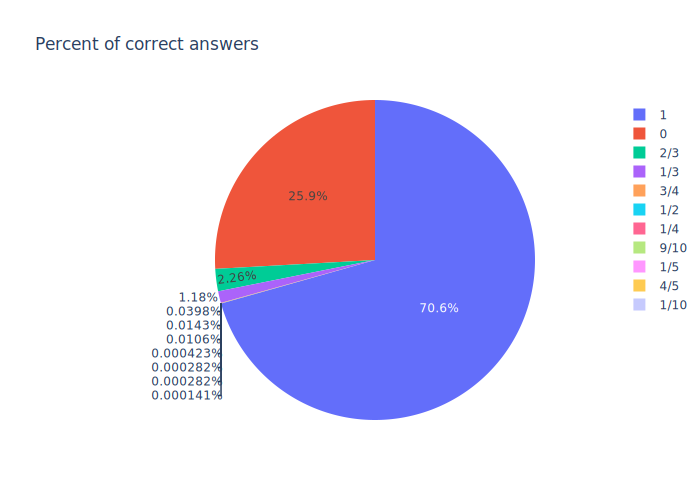

In [8]:
ds = data['correct'].value_counts().reset_index()

ds.columns = [
    'correct',
    'percent'
]

ds['percent'] /= len(data)
ds = ds.sort_values(['correct'])

fig = px.pie(
    ds,
    names = ['0', '1/10','1/5', '1/4','1/3', '1/2','2/3', '3/4','4/5','9/10', '1'],
    values = 'percent',
    title = 'Percent of correct answers'    
)

fig.show("svg")

Minor note: we also have Essay questions that teachers can grade. If this value is say .25 that means the teacher gave it a 1 our of 4. 

## Sort by sequence id

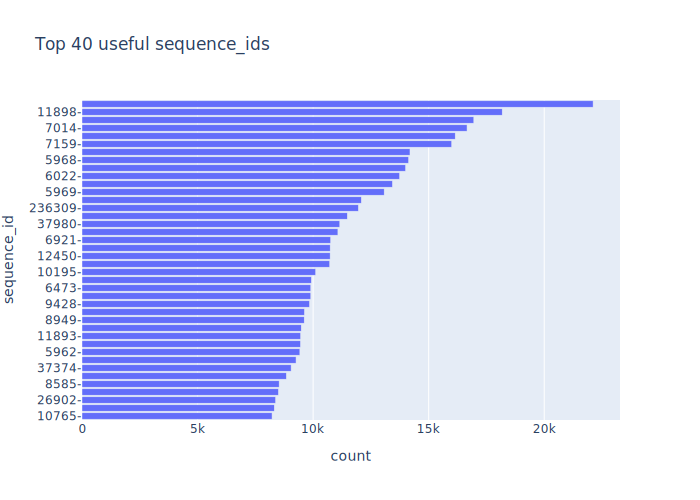

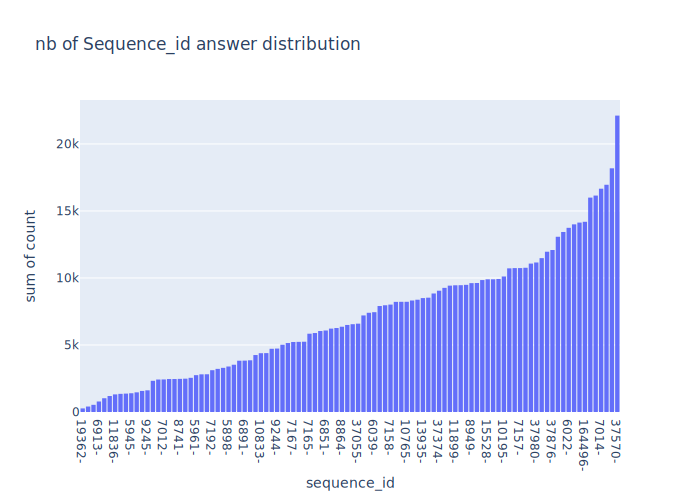

In [9]:
ds = data['sequence_id'].value_counts().reset_index() 

ds.columns = [
    'sequence_id',
    'count'
]

ds['sequence_id'] = ds['sequence_id'].astype(str) + '-'
ds1 = ds.sort_values(['count']).tail(40)

fig1 = px.bar(
    ds1,
    x = 'count',
    y = 'sequence_id',
    orientation = 'h',
    title = 'Top 40 useful sequence_ids'
)

fig1.show("svg")

ds2 = ds.sort_values(['count'])

fig2 = px.histogram(
    ds2,
    x = 'sequence_id',
    y = 'count',
    title = 'nb of Sequence_id answer distribution'
)

fig2.show("svg")

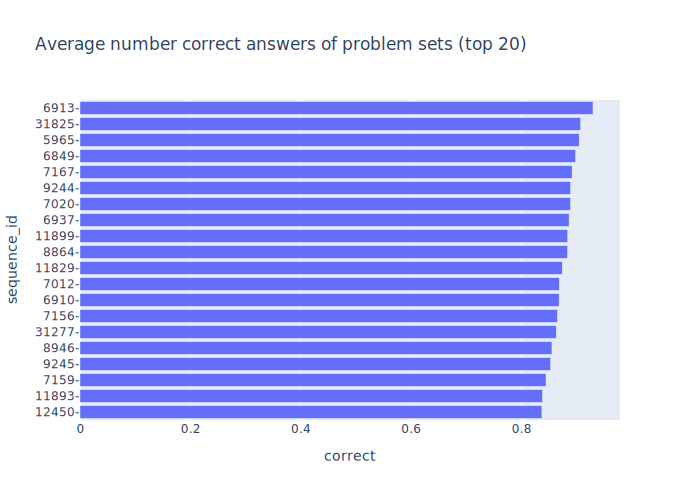

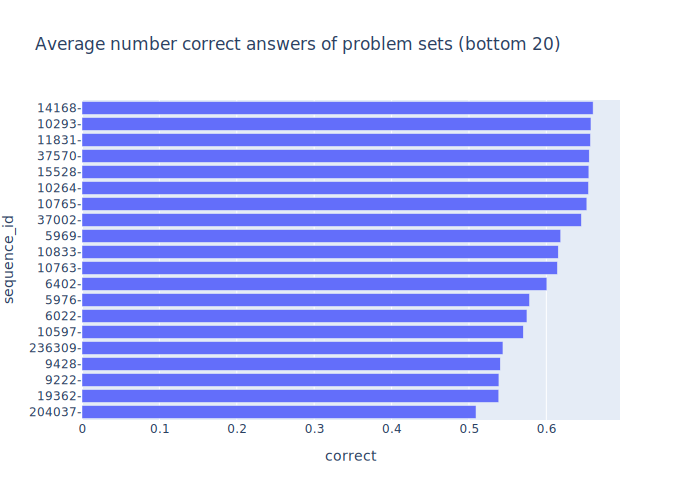

In [10]:
ds = data.groupby('sequence_id')['correct'].mean() 
ds = ds.reset_index()

ds['sequence_id'] = ds['sequence_id'].astype(str) + '-'
ds1 = ds.sort_values(['correct']).tail(20)

fig1 = px.bar(
    ds1,
    x = 'correct',
    y = 'sequence_id',
    orientation = 'h',
    title = 'Average number correct answers of problem sets (top 20)'
)

fig1.show("svg")

ds2 = ds.sort_values(['correct']).head(20)

fig2 = px.bar(
    ds2,
    x = 'correct',
    y = 'sequence_id',
    orientation = 'h',
    title = 'Average number correct answers of problem sets (bottom 20)'
)
fig2.show("svg")

This figure presents the average number correct answers of problem sets. These low-average problem sets deserve more attention from teachers and students.

In [11]:
ds = data.groupby('user_id')['correct'].sum()
ds = ds.reset_index()

#ds['sequence_id'] = ds['sequence_id'].astype(str) + '-'
ds1 = ds.sort_values(['user_id'])

fig1 = px.histogram(
    ds1,
    x = 'user_id',
    y = 'correct',
    title = 'number of correct answer per student'
)
fig1.show()

## Data representation

### Data preparation

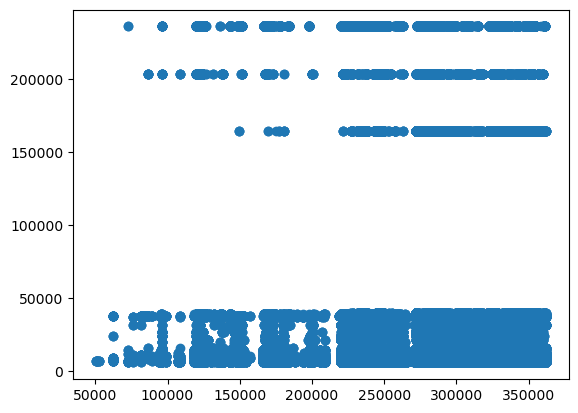

In [12]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots()
ax.scatter(data['user_id'],data['sequence_id'])
plt.show()

## Normalisation des numéros de question

In [13]:
dictionnary = dict()
ds = data[['user_id','sequence_id','correct']]

unique_question_ids = ds['sequence_id'].unique()
nb_questions = unique_question_ids.shape[0]

for i in range(nb_questions):
    dictionnary[unique_question_ids[i]]=i

ds['sequence_id'] = ds['sequence_id'].replace(dictionnary)

/tmp/ipykernel_15813/1336656236.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## Normalisation des numéros étudiant

In [14]:
dictionnary = dict()

unique_user_ids = ds['user_id'].unique()
user_nb = unique_user_ids.shape[0]
for i in range(user_nb):
    dictionnary[unique_user_ids[i]]=i

ds['user_id'] = ds['user_id'].replace(dictionnary)

/tmp/ipykernel_15813/1813744120.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [194]:
map = np.zeros(shape = (nb_questions,user_nb))
print(ds)
for r in ds.iterrows() :
    map[int(r[1]['sequence_id']),int(r[1]['user_id'])] = r[1]['correct']+1



        user_id  sequence_id   correct
0             0            0  0.000000
1             0            0  1.000000
2             0            0  1.000000
3             0            0  1.000000
4             1            0  1.000000
...         ...          ...       ...
708626    19916           47  0.666667
708627    19916           47  0.666667
708628    19916           47  1.000000
708629    19916           47  1.000000
708630    19916           47  1.000000

[708631 rows x 3 columns]


<Axes: >

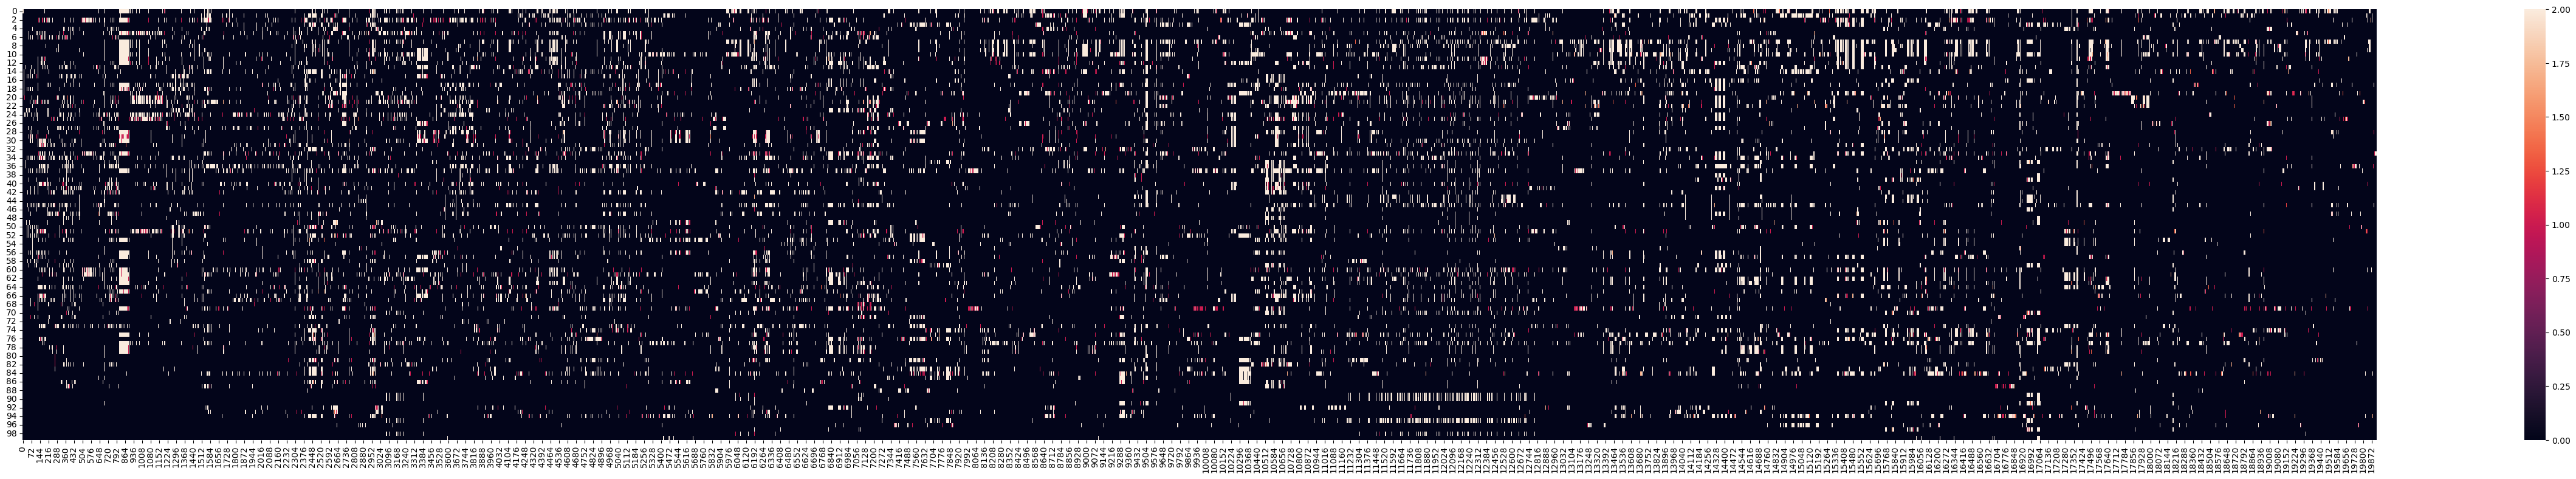

In [37]:
import seaborn as sns

# figure settings
figure_width = 125 # cm
figure_height = 20 # cm
left_right_magrin = 1 # cm
top_bottom_margin = 1 # cm

# Don't change
left   = left_right_magrin / figure_width # Percentage from height
bottom = top_bottom_margin / figure_height # Percentage from height
width  = 1 - left*2
height = 1 - bottom*2
cm2inch = 1/2.54 # inch per cm

# specifying the width and the height of the box in inches
fig = plt.figure(figsize=(figure_width*cm2inch,figure_height*cm2inch))
ax = fig.add_axes((left, bottom, width, height))

sns.heatmap(map, ax=ax)

In [38]:
from sklearn.decomposition import SparsePCA, KernelPCA

pca = SparsePCA(n_components=2)
d = pca.fit_transform(map.transpose())

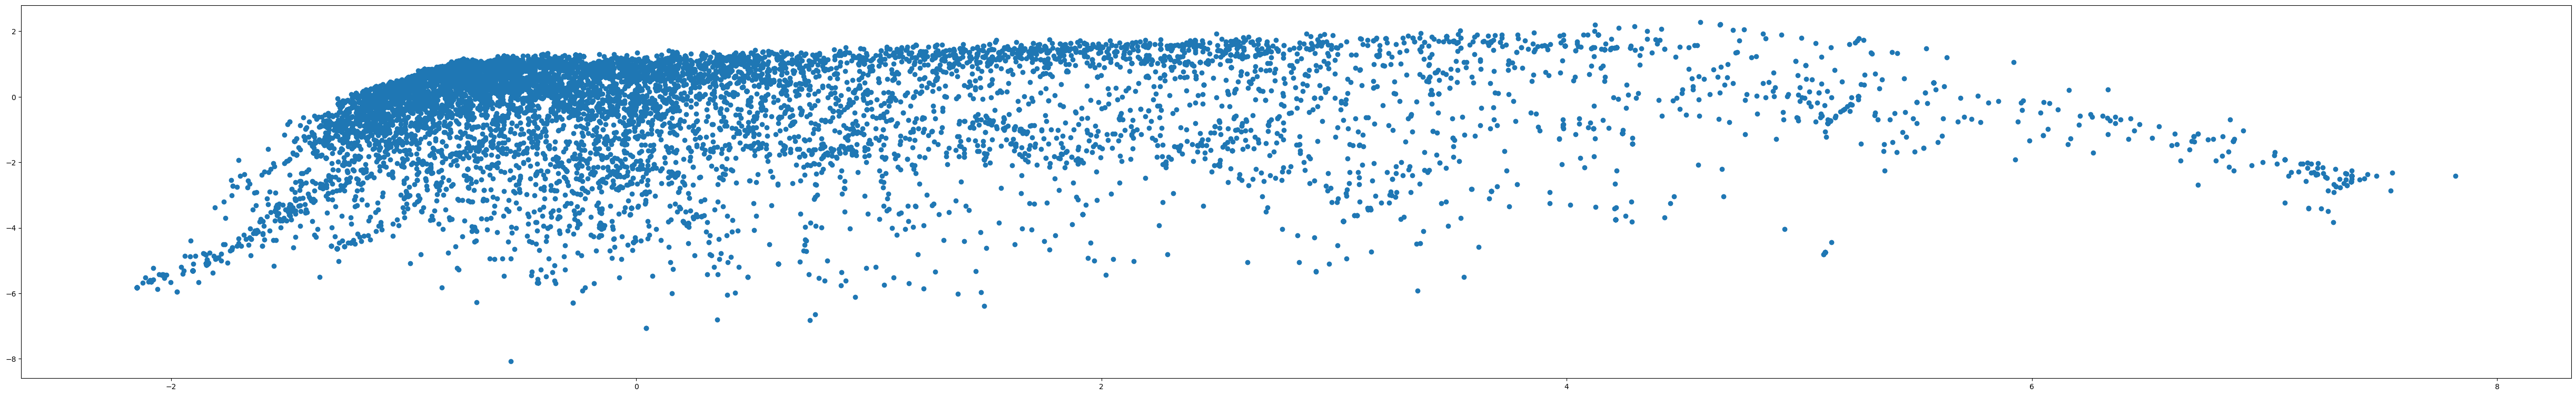

In [39]:
# figure settings
figure_width = 125 # cm
figure_height = 20 # cm
left_right_magrin = 1 # cm
top_bottom_margin = 1 # cm

# Don't change
left   = left_right_magrin / figure_width # Percentage from height
bottom = top_bottom_margin / figure_height # Percentage from height
width  = 1 - left*2
height = 1 - bottom*2
cm2inch = 1/2.54 # inch per cm

# specifying the width and the height of the box in inches
fig = plt.figure(figsize=(figure_width*cm2inch,figure_height*cm2inch))
ax = fig.add_axes((left, bottom, width, height))

ax.scatter(d[:,0],d[:,1])

In [42]:
nb_corrects = np.where(map>1,1,0).sum(axis=1)
nb_tot = np.where(map!=0,1,0).sum(axis=1)

In [43]:
proba = np.divide(nb_corrects,nb_tot)

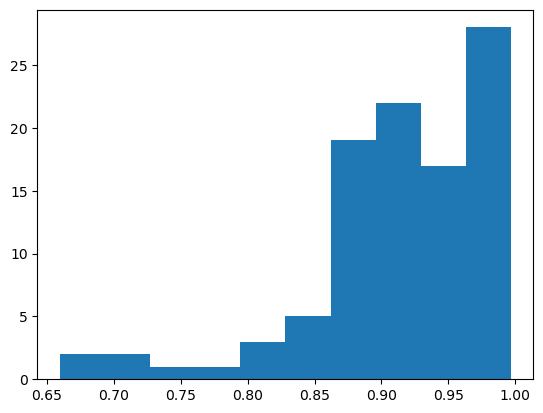

In [44]:
fig,ax = plt.subplots()
plt.hist(proba)
plt.show()

In [45]:
map2 = map - np.ones(shape=map.shape)
for iq in range(100):
    for iu in range(map.shape[1]) :
        if map[iq,iu] == 0 :
            map2[iq,iu] = np.random.binomial(1,proba[iq],1)

<Axes: >

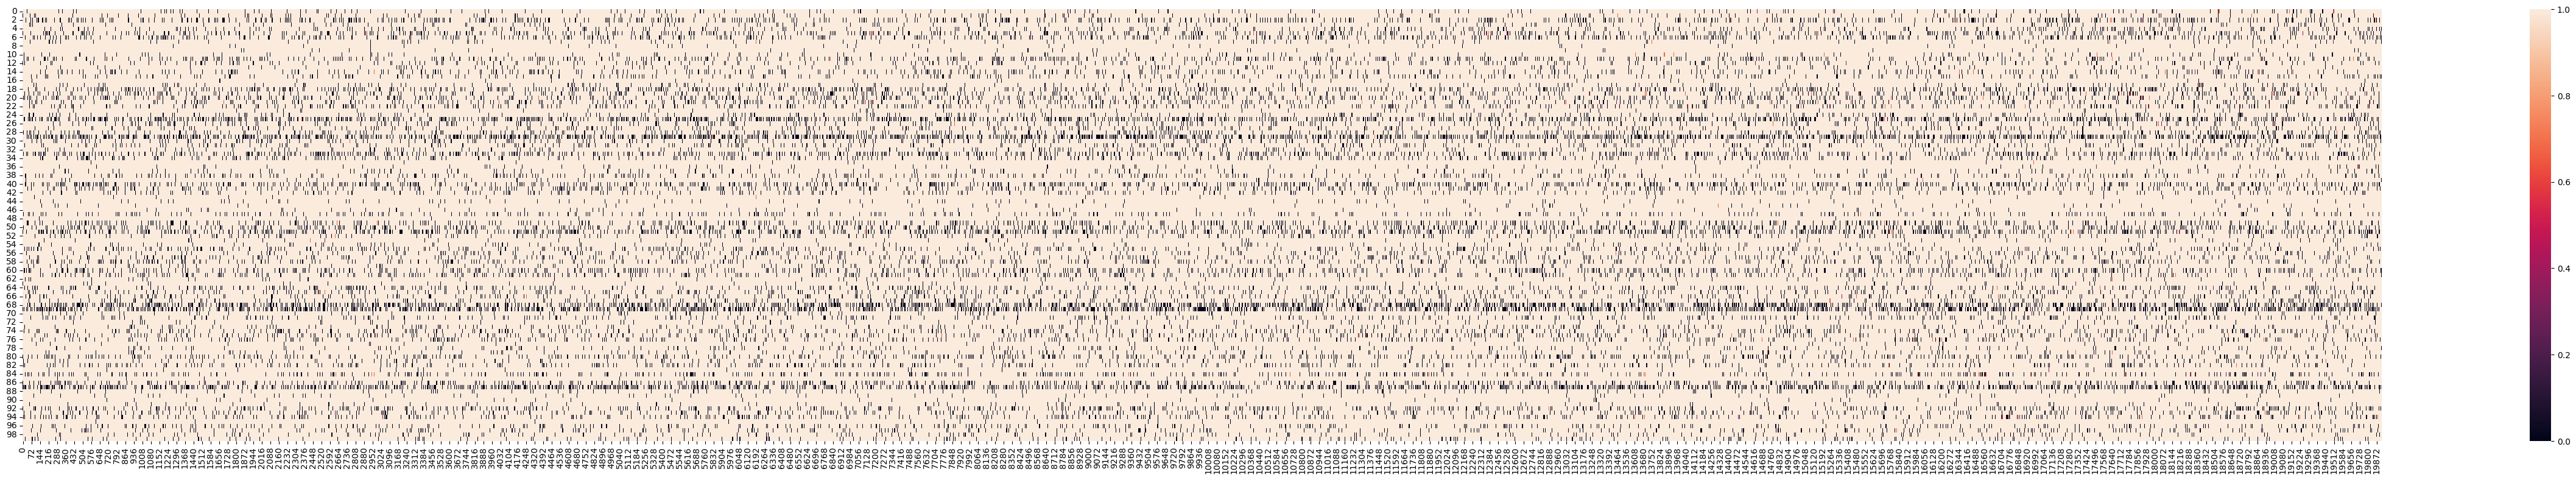

In [46]:
import seaborn as sns

# figure settings
figure_width = 125 # cm
figure_height = 20 # cm
left_right_magrin = 1 # cm
top_bottom_margin = 1 # cm

# Don't change
left   = left_right_magrin / figure_width # Percentage from height
bottom = top_bottom_margin / figure_height # Percentage from height
width  = 1 - left*2
height = 1 - bottom*2
cm2inch = 1/2.54 # inch per cm

# specifying the width and the height of the box in inches
fig = plt.figure(figsize=(figure_width*cm2inch,figure_height*cm2inch))
ax = fig.add_axes((left, bottom, width, height))

sns.heatmap(map2, ax=ax)

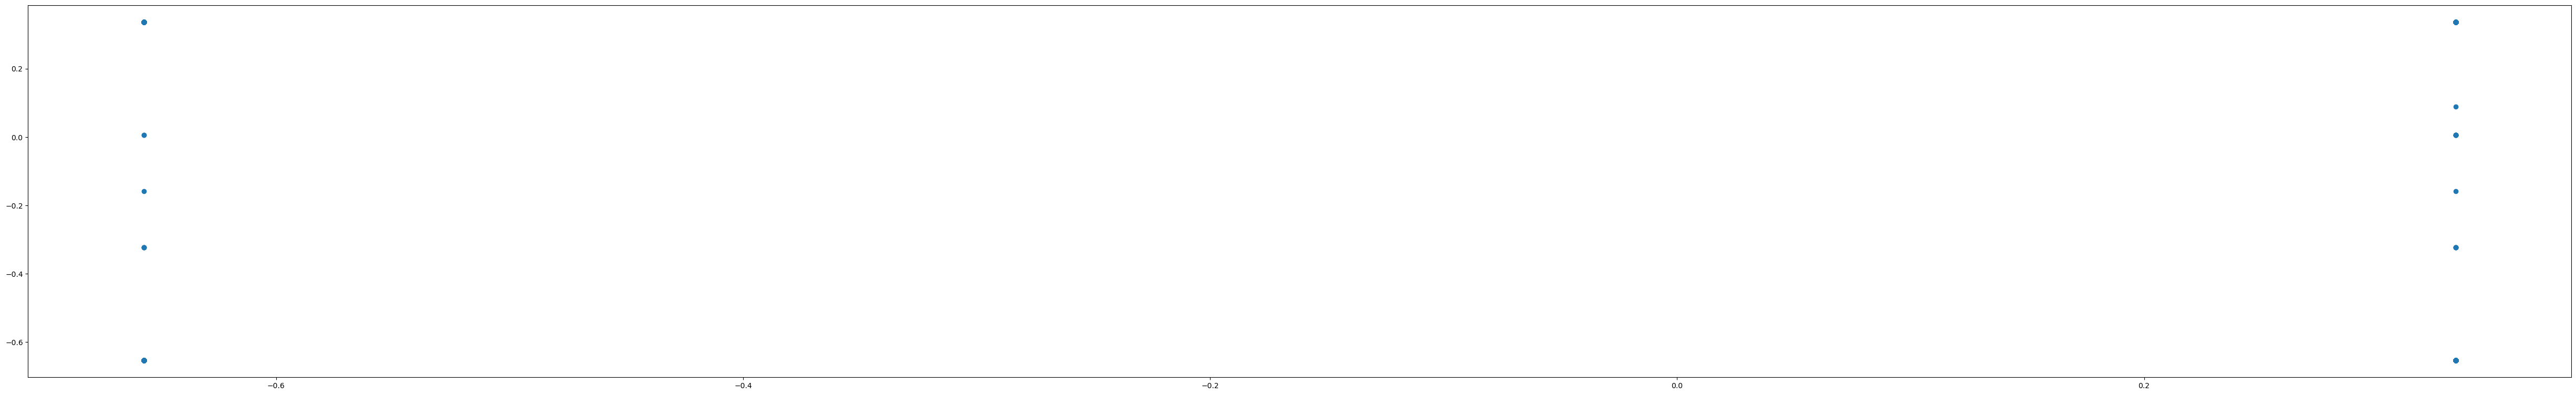

In [50]:
from sklearn.decomposition import SparsePCA

pca = SparsePCA(n_components=2)
d = pca.fit_transform(map2.transpose())

# figure settings
figure_width = 125  # cm
figure_height = 20  # cm
left_right_magrin = 1  # cm
top_bottom_margin = 1  # cm

# Don't change
left = left_right_magrin / figure_width  # Percentage from height
bottom = top_bottom_margin / figure_height  # Percentage from height
width = 1 - left * 2
height = 1 - bottom * 2
cm2inch = 1 / 2.54  # inch per cm

# specifying the width and the height of the box in inches
fig = plt.figure(figsize=(figure_width * cm2inch, figure_height * cm2inch))
ax = fig.add_axes((left, bottom, width, height))

ax.scatter(d[:, 0], d[:, 1])

In [52]:
from sklearn.manifold import Isomap

embedding = Isomap(n_components=2)
X_transformed = embedding.fit_transform(map.transpose())

/home/arthurb/anaconda3/envs/conda_EduCDM/lib/python3.8/site-packages/sklearn/manifold/_isomap.py:348: UserWarning:

The number of connected components of the neighbors graph is 63 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.

/home/arthurb/anaconda3/envs/conda_EduCDM/lib/python3.8/site-packages/scipy/sparse/_index.py:103: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.

/home/arthurb/anaconda3/envs/conda_EduCDM/lib/python3.8/site-packages/scipy/sparse/_index.py:103: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.

/home/arthurb/anaconda3/envs/conda_EduCDM/lib/python3.8/site-packages/scipy/sparse/_index.py:103: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.

/home/arthurb/anaconda3/envs/conda_EduCDM/lib/python3.8/si

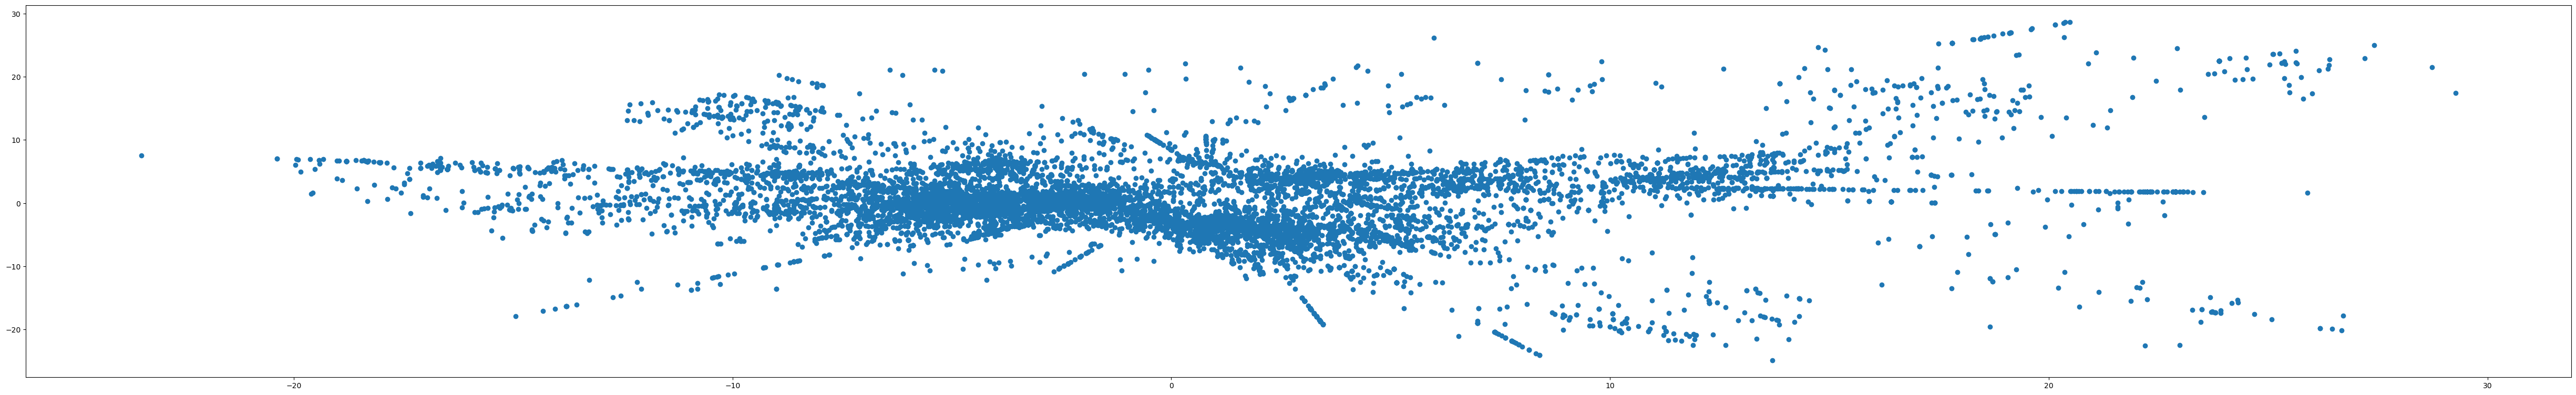

In [53]:
# figure settings
figure_width = 125  # cm
figure_height = 20  # cm
left_right_magrin = 1  # cm
top_bottom_margin = 1  # cm

# Don't change
left = left_right_magrin / figure_width  # Percentage from height
bottom = top_bottom_margin / figure_height  # Percentage from height
width = 1 - left * 2
height = 1 - bottom * 2
cm2inch = 1 / 2.54  # inch per cm

# specifying the width and the height of the box in inches
fig = plt.figure(figsize=(figure_width * cm2inch, figure_height * cm2inch))
ax = fig.add_axes((left, bottom, width, height))

ax.scatter(X_transformed[:, 0], X_transformed[:, 1])

In [54]:
from sklearn.manifold import Isomap

embedding = Isomap(n_components=2)
X_transformed = embedding.fit_transform(map)

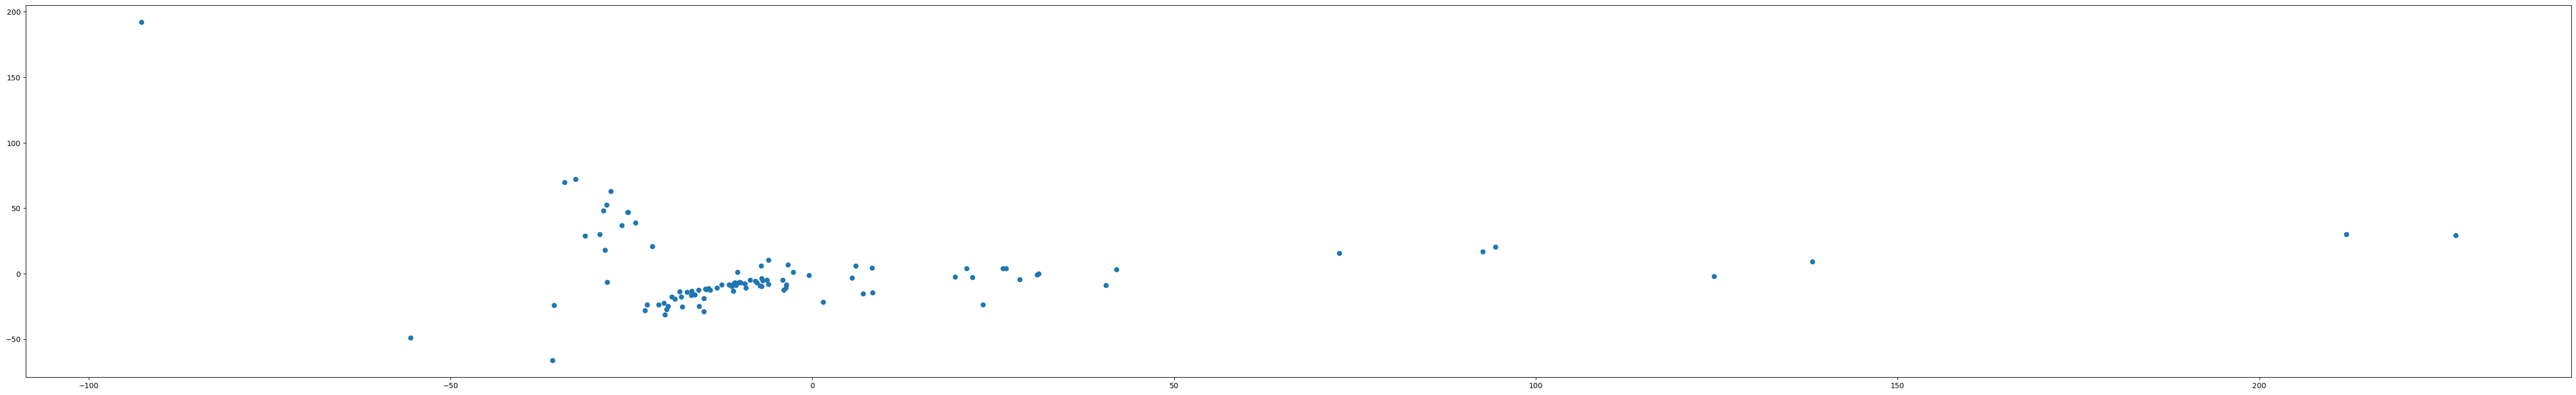

In [55]:
# figure settings
figure_width = 125  # cm
figure_height = 20  # cm
left_right_magrin = 1  # cm
top_bottom_margin = 1  # cm

# Don't change
left = left_right_magrin / figure_width  # Percentage from height
bottom = top_bottom_margin / figure_height  # Percentage from height
width = 1 - left * 2
height = 1 - bottom * 2
cm2inch = 1 / 2.54  # inch per cm

# specifying the width and the height of the box in inches
fig = plt.figure(figsize=(figure_width * cm2inch, figure_height * cm2inch))
ax = fig.add_axes((left, bottom, width, height))

ax.scatter(X_transformed[:, 0], X_transformed[:, 1])

In [72]:
from scipy.spatial import distance

def distance_X(X,Y) -> float :
    d = 0
    nb_common_q = 1
    for i in range(X.shape[0]) :
        if X[i] !=0 and Y[i] !=0 :
            d += abs(X[i] - Y[i])
            nb_common_q +=1

    return d/nb_common_q

D = distance.pdist(map.transpose(),metric=distance_X)

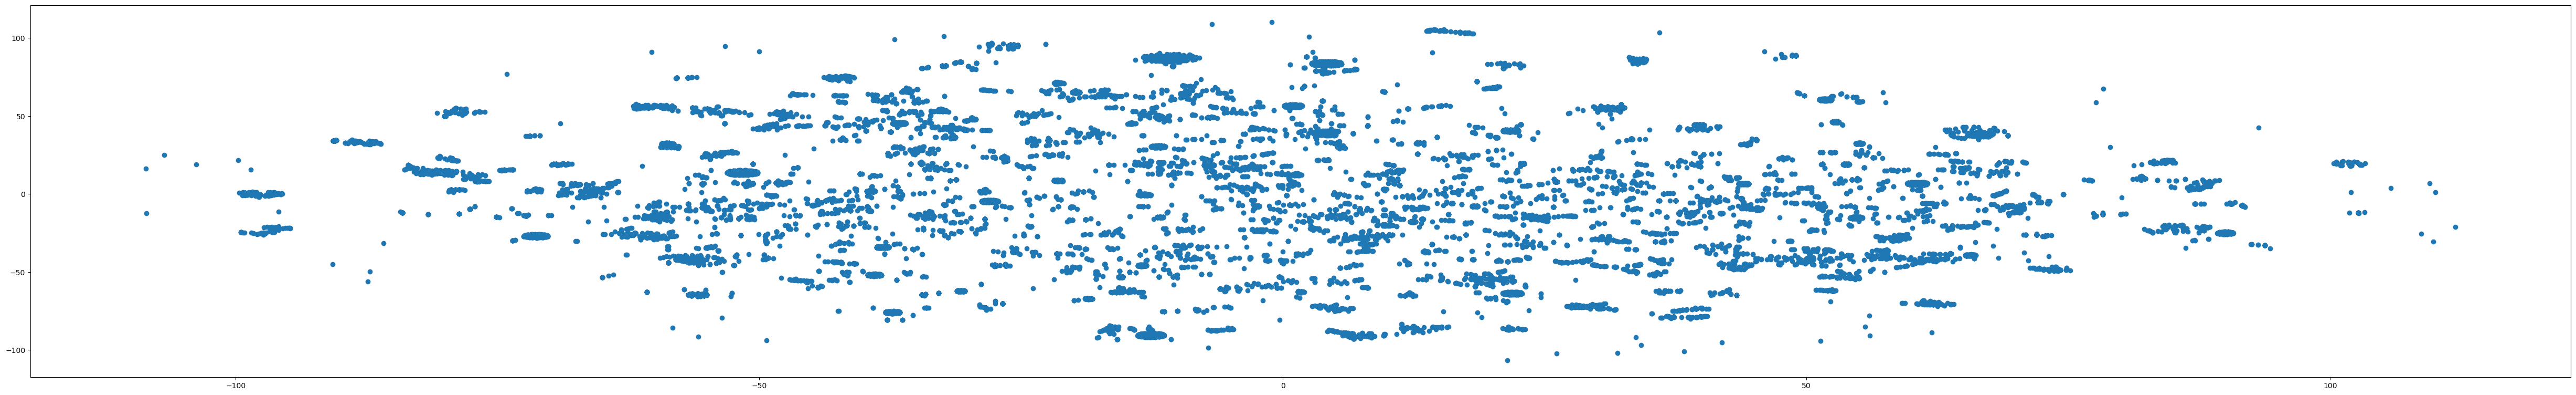

In [93]:

from sklearn.manifold import TSNE


X_embedded = TSNE(n_components=2, learning_rate='auto',init='random', perplexity=50).fit_transform(map.transpose())

# figure settings
figure_width = 125  # cm
figure_height = 20  # cm
left_right_magrin = 1  # cm
top_bottom_margin = 1  # cm

# Don't change
left = left_right_magrin / figure_width  # Percentage from height
bottom = top_bottom_margin / figure_height  # Percentage from height
width = 1 - left * 2
height = 1 - bottom * 2
cm2inch = 1 / 2.54  # inch per cm

# specifying the width and the height of the box in inches
fig = plt.figure(figsize=(figure_width * cm2inch, figure_height * cm2inch))
ax = fig.add_axes((left, bottom, width, height))

ax.scatter(X_embedded[:, 0], X_embedded[:, 1])

In [94]:
from sklearn import mixture

gmm = mixture.GaussianMixture(n_components=50,random_state=0)
label = gmm.fit_predict(map.transpose())

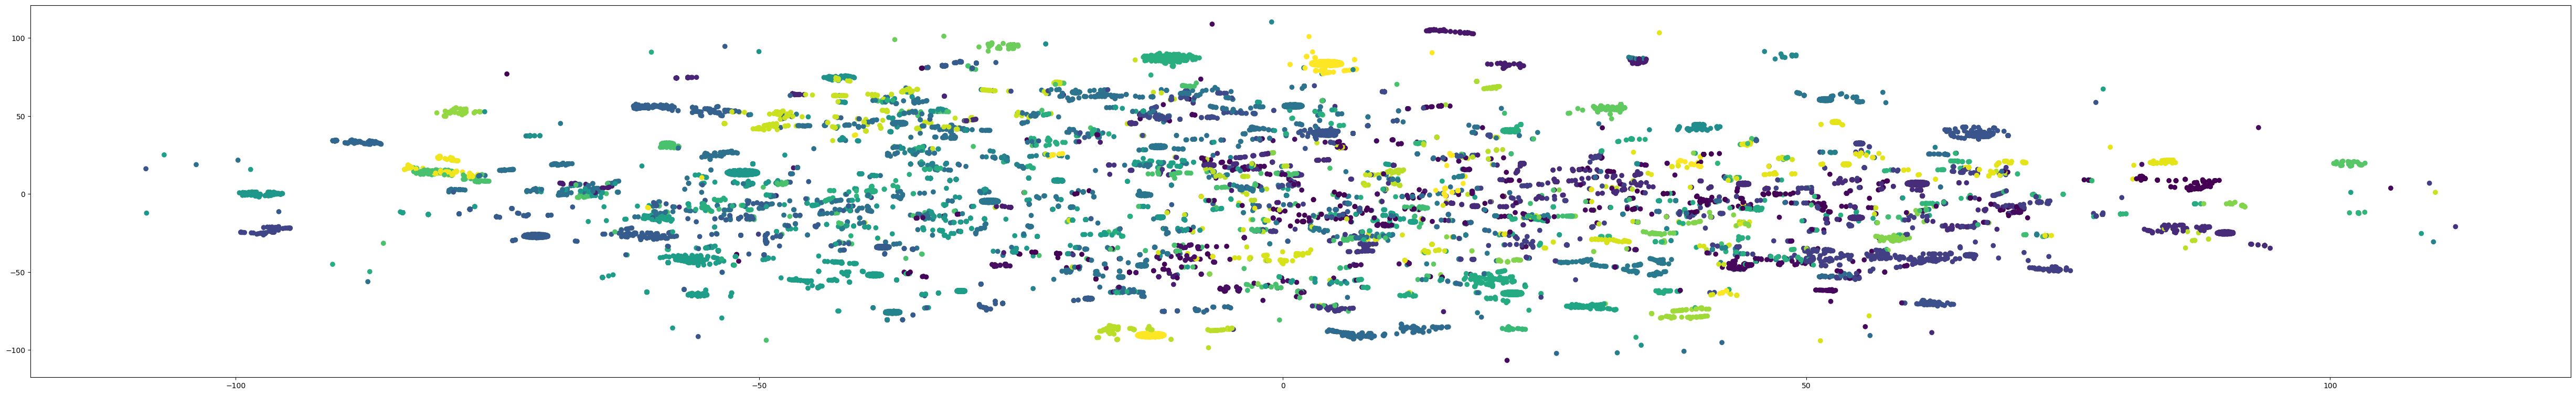

In [96]:
# figure settings
figure_width = 125  # cm
figure_height = 20  # cm
left_right_magrin = 1  # cm
top_bottom_margin = 1  # cm

# Don't change
left = left_right_magrin / figure_width  # Percentage from height
bottom = top_bottom_margin / figure_height  # Percentage from height
width = 1 - left * 2
height = 1 - bottom * 2
cm2inch = 1 / 2.54  # inch per cm

# specifying the width and the height of the box in inches
fig = plt.figure(figsize=(figure_width * cm2inch, figure_height * cm2inch))
ax = fig.add_axes((left, bottom, width, height))

ax.scatter(X_embedded[:, 0], X_embedded[:, 1], c=label)

In [115]:
label = np.ndarray((40,19917))
score = np.ndarray((40,1))
for i in range (20,60) :
    gmm = mixture.GaussianMixture(n_components=i,random_state=0)
    label[i-20,:] = gmm.fit_predict(map.transpose())
    score[i-20] = gmm.score(map.transpose())

In [120]:
from sklearn import metrics
s = []
for l in label :
    s.append(float(metrics.silhouette_score(map.transpose(), l, metric='euclidean')))

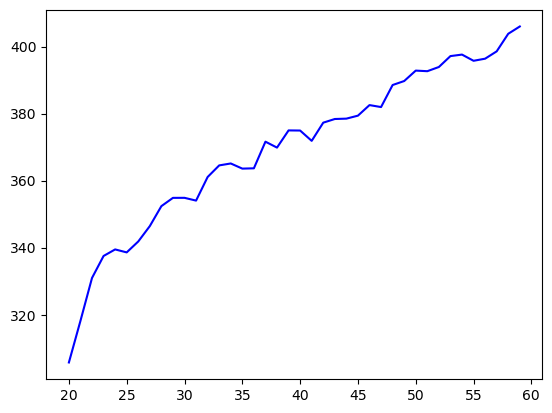

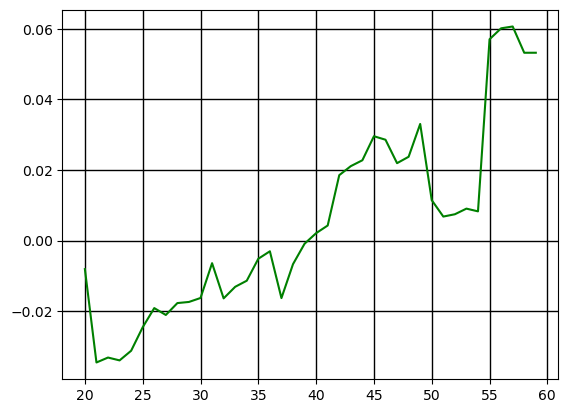

In [145]:
fig,ax = plt.subplots()

ax.plot(range(20,60),score,c='b')

plt.show()
fig2,ax = plt.subplots()
ax.plot(range(20,60),s,c='g')


plt.grid(color='black', linestyle='-', linewidth=1)
plt.show()


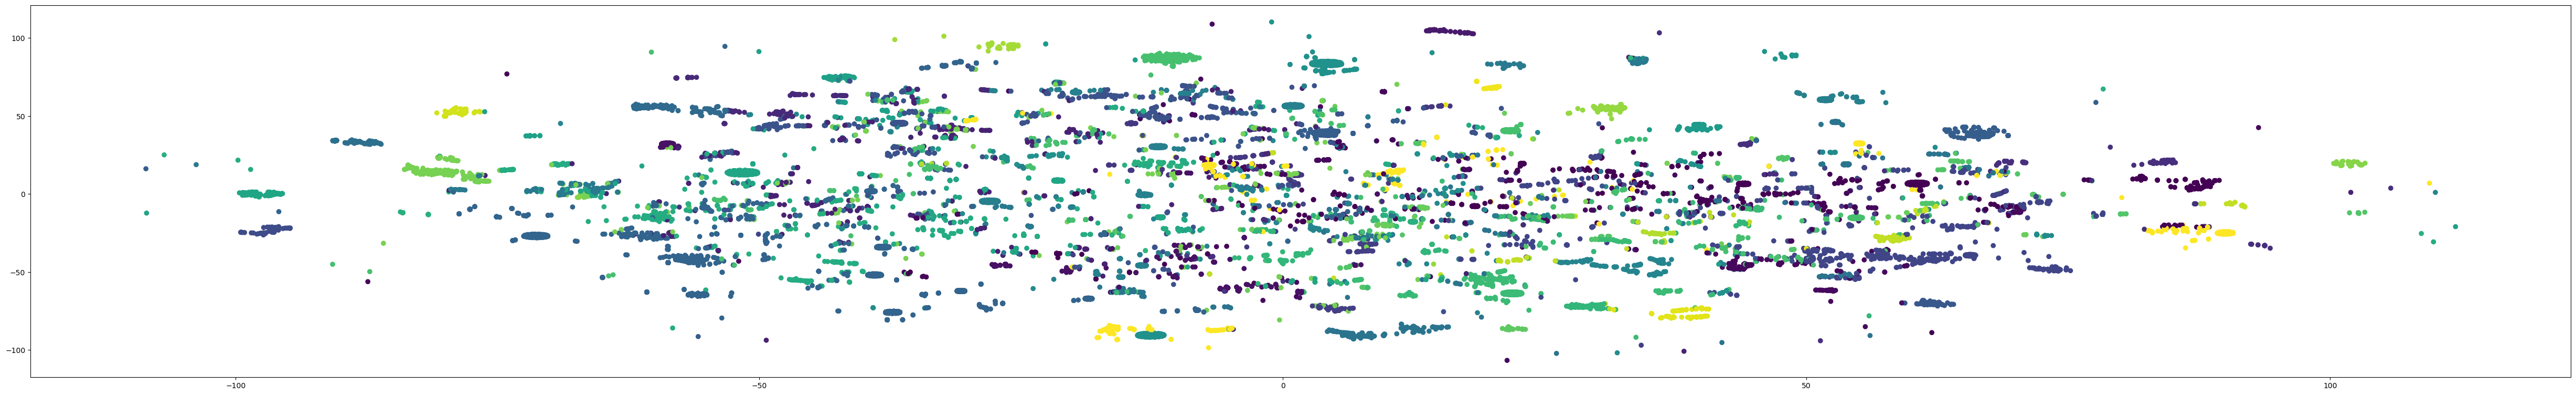

In [148]:
# figure settings
figure_width = 125  # cm
figure_height = 20  # cm
left_right_magrin = 1  # cm
top_bottom_margin = 1  # cm

# Don't change
left = left_right_magrin / figure_width  # Percentage from height
bottom = top_bottom_margin / figure_height  # Percentage from height
width = 1 - left * 2
height = 1 - bottom * 2
cm2inch = 1 / 2.54  # inch per cm

# specifying the width and the height of the box in inches
fig = plt.figure(figsize=(figure_width * cm2inch, figure_height * cm2inch))
ax = fig.add_axes((left, bottom, width, height))

ax.scatter(X_embedded[:, 0], X_embedded[:, 1], c=label[25])

In [243]:
a = np.array([label[25]],dtype=int)
sorted_ind = np.argsort(a)

In [244]:
sorted_map = map

for i in range(sorted_ind.shape[1]) :
    sorted_map[:,i] = map[:,sorted_ind[0,i]]

<Axes: >

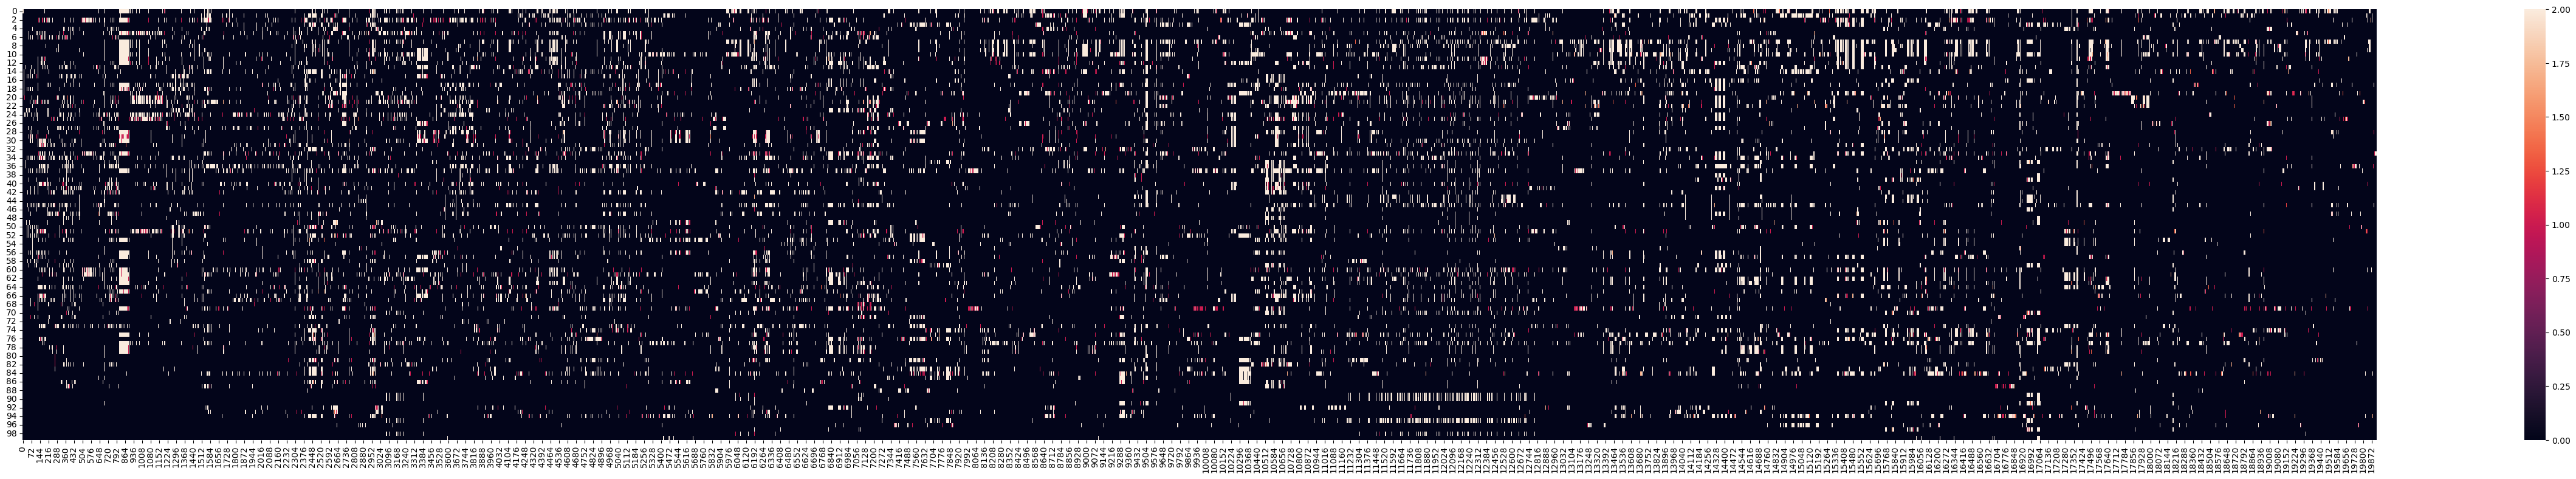

In [220]:

# figure settings
figure_width = 125 # cm
figure_height = 20 # cm
left_right_magrin = 1 # cm
top_bottom_margin = 1 # cm

# Don't change
left   = left_right_magrin / figure_width # Percentage from height
bottom = top_bottom_margin / figure_height # Percentage from height
width  = 1 - left*2
height = 1 - bottom*2
cm2inch = 1/2.54 # inch per cm

# specifying the width and the height of the box in inches
fig = plt.figure(figsize=(figure_width*cm2inch,figure_height*cm2inch))
ax = fig.add_axes((left, bottom, width, height))

sns.heatmap(map, ax=ax)

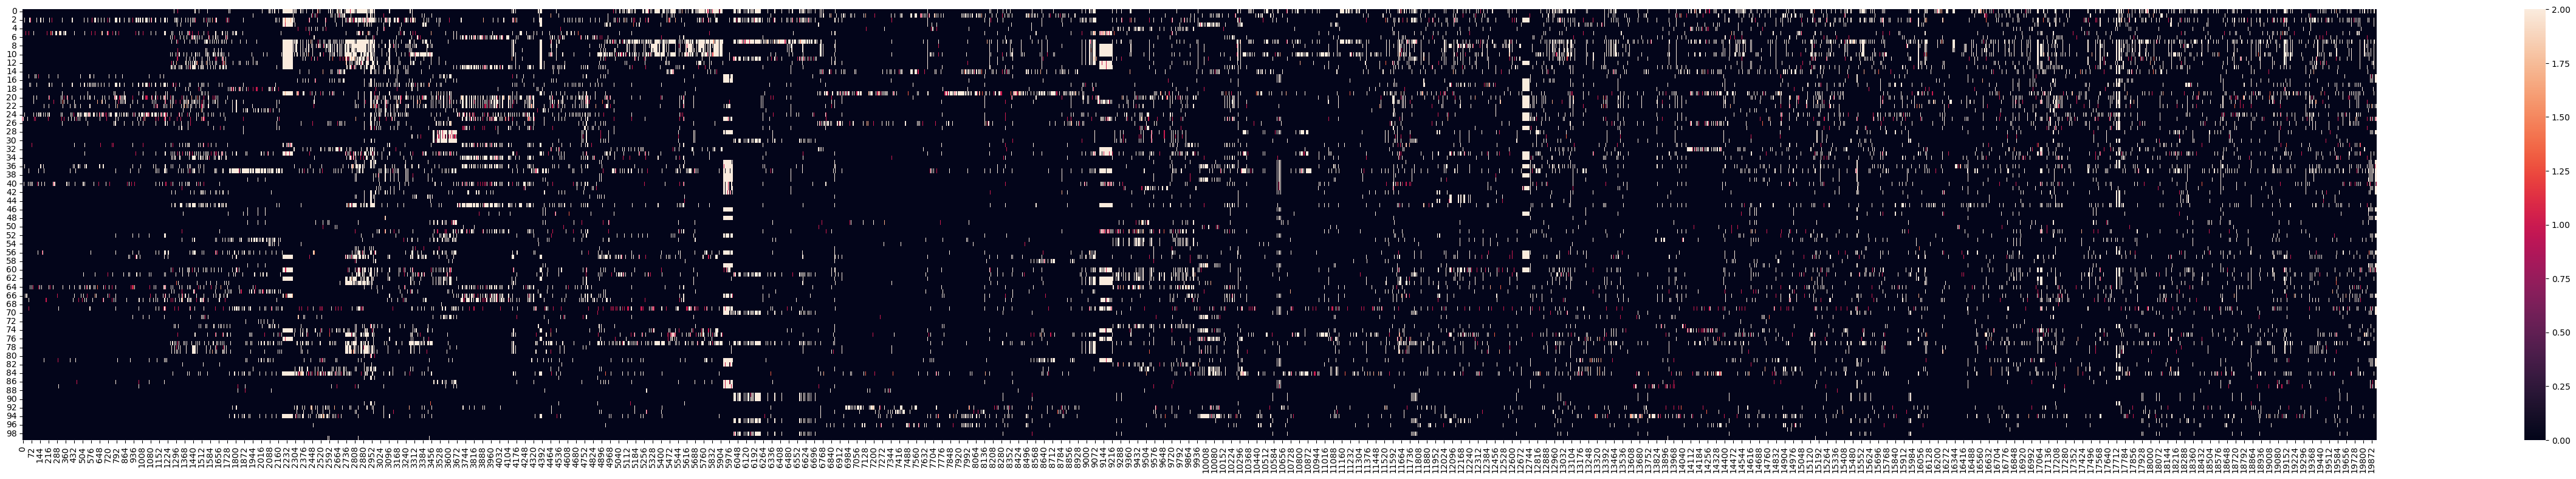

In [246]:
# figure settings
figure_width = 125 # cm
figure_height = 20 # cm
left_right_magrin = 1 # cm
top_bottom_margin = 1 # cm

# Don't change
left   = left_right_magrin / figure_width # Percentage from height
bottom = top_bottom_margin / figure_height # Percentage from height
width  = 1 - left*2
height = 1 - bottom*2
cm2inch = 1/2.54 # inch per cm

# specifying the width and the height of the box in inches
fig = plt.figure(figsize=(figure_width*cm2inch,figure_height*cm2inch))
ax = fig.add_axes((left, bottom, width, height))

sns.heatmap(sorted_map, ax=ax)
fig.savefig("sorted 2015 heatmap.png")